# Ch2 looking for trends in healthcare data
### dataset comes from here: https://www.openml.org/d/1471

### An EEG is a test that detects abnormalities in your brain waves, or in the electrical activity of your brain.
### This dataset is one continuous 117 second EEG measurement
### We want to see if the EEG measurements have cyclical trends

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
from sklearn.datasets import fetch_openml
from scipy import signal

In [2]:
# Get EEG dataset from openml site
eeg = fetch_openml(data_id=1471, as_frame=True)
increment = 117 / len(eeg['data'])

index = np.linspace(
    start=0,
    stop=increment*len(eeg['data']),
    num=len(eeg['data'])
)
ts_index = pd.to_datetime(index, unit='s')
v1 = pd.Series(name='V1', data=eeg['data']['V1'].values, index=ts_index)

In [3]:
#Slice dataset
slicing = (v1.index >= '1970-01-01 00:00:08') & (v1.index <='1970-01-01 00:01:10.000000000')
v1[slicing]

1970-01-01 00:00:08.006208692    4289.74
1970-01-01 00:00:08.014019627    4284.10
1970-01-01 00:00:08.021830562    4280.00
1970-01-01 00:00:08.029641498    4289.74
1970-01-01 00:00:08.037452433    4298.46
                                  ...   
1970-01-01 00:01:09.962547566    4289.74
1970-01-01 00:01:09.970358501    4283.08
1970-01-01 00:01:09.978169437    4284.62
1970-01-01 00:01:09.985980372    4289.23
1970-01-01 00:01:09.993791307    4290.77
Name: V1, Length: 7937, dtype: float64

Text(0.5, 0, 'seconds')

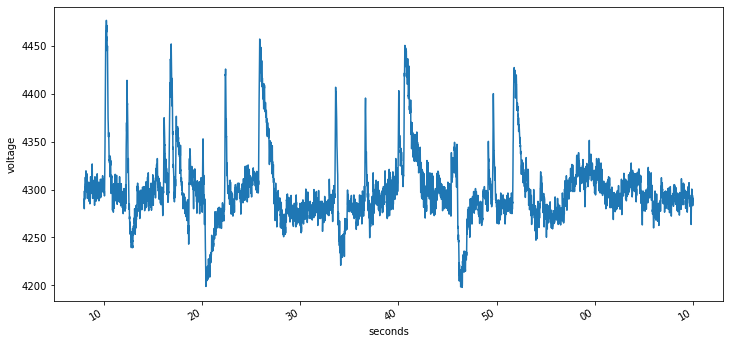

In [4]:
# to plot EEG signal over time
date_formatter = DateFormatter("%S")
ax = v1[slicing].plot(figsize=(12, 6))
ax.xaxis.set_major_formatter(date_formatter)
plt.ylabel('voltage')
plt.xlabel('seconds')

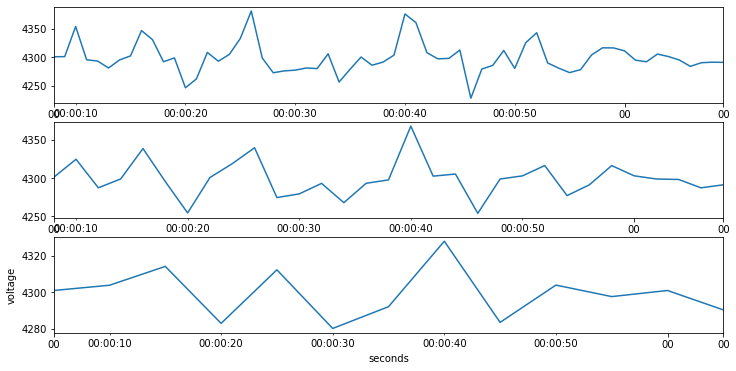

In [5]:
#plotting the data with 1 second, 2 second, 5 seconds
plt.subplot(311)
ax1 = v1[slicing].resample('1s').mean().plot(figsize=(12, 6))
ax1.xaxis.set_major_formatter(date_formatter)

plt.subplot(312)
ax1 = v1[slicing].resample('2s').mean().plot(figsize=(12, 6))
ax1.xaxis.set_major_formatter(date_formatter)

plt.subplot(313)
ax2 = v1[slicing].resample('5s').mean().plot(figsize=(12, 6))
ax2.xaxis.set_major_formatter(date_formatter)

plt.ylabel('voltage')
plt.xlabel('seconds');

# Creating a periodogram, 
### which can be a helpful tool for identifying the dominant cyclical behavior in a series,
### particularly when the cycles are not monthly or quarterly seasonalities

Text(0, 0.5, 'Power Spectrum')

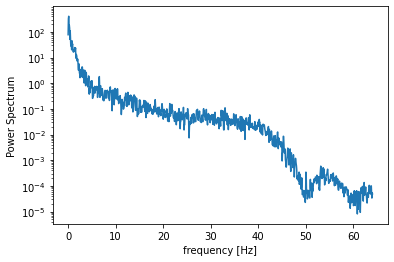

In [9]:
fs = len(eeg['data']) // 117
f, Pxx_den = signal.welch(
    v1[slicing].values,
    fs,
    nperseg=2048,
    scaling='spectrum'
)
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('Power Spectrum')

In [ ]:
# low frequencies are particularly powerful. The signal shows a slow oscillation.